In [1]:
#Librerías que utilicé 
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import warnings 
warnings.filterwarnings('ignore') 
import scipy.stats as stats

## ¿Las diferencias en las calificaciones más altas reflejan el interés de los alumnos por aprender?

In [2]:
#Aquí leo el csv llamado "data.csv"
calificaciones = pd.read_csv('data.csv',index_col=False)

In [3]:
#Muestro que mi información se haya cargado correctamente
calificaciones.head()

,participant,age:1,gender:1,salidas:1,noviazgo:1,origen:1,calificacion_mejor:1,calificacion_peor:1,antecedente_psiq:1,ndc:1,...,ndc:14,ndc:15,ndc:16,ndc:17,ndc:18,igt:1,country,TIME_start,TIME_end,TIME_total
0,s.15f718b2-b3b8-418b-90d1-056f179c59f2.txt,18,1,2,1,2,10.0,0,2,5,...,5,5,2,2,5,igt.2020-01-15-1737.data.15f718b2-b3b8-418b-90...,"MX, Mexico",2020-01-15-17-29,2020-01-15-17-37,8.0
1,s.65fc217a-f4de-459f-9acb-272237a94e73.txt,20 años,1,3,2,2,82.0,5.95,1,4,...,4,4,3,2,2,NaN,"MX, Mexico",2020-01-15-17-29,NaN,NaN
2,s.0742574d-2230-48f0-b795-42e1fd5d0839.txt,18,1,3,2,2,NaN,No he tenido,2,3,...,4,2,5,2,5,NaN,"MX, Mexico",2020-01-15-17-30,NaN,NaN
3,s.26328d2c-466f-467e-9860-b27601337486.txt,5,2,2,2,2,67.0,NaN,1,1,...,2,5,3,4,3,NaN,"MX, Mexico",2020-01-15-17-49,NaN,NaN
4,s.a5d28f06-3929-447b-b456-51f14a0ed00b.txt,18 años,2,3,2,2,9.4,7,2,3,...,3,3,5,1,4,igt.2020-01-15-1740.data.a5d28f06-3929-447b-b4...,"MX, Mexico",2020-01-15-17-30,2020-01-15-17-40,10.0


Hay que considerar que en la columna de esta información no había instrucciones, por tanto, quienes no tenían calificaciones podían o no escribir números. Tampoco estaba estandarizado el formato, por ende, algunos escribireron sus calificaciones en base 10 y otros en base 100

In [4]:
#Aquí elimino aquellas entradas que no hayan sido numéricas para las calificaciones... simplemente no se pueden trabajar
calificaciones['calificacion_mejor:1'] = calificaciones['calificacion_mejor:1'].astype(str)
#lista de las columnas por borrar
borrar=[]
#Identifico las columnas donde aparecen valores no numéricos
for index,row in calificaciones.iterrows():
    if (('n') or ('N')) in calificaciones['calificacion_mejor:1'][index]:
        borrar.append(index)
calificaciones['calificacion_mejor:1'] = calificaciones['calificacion_mejor:1'].astype(float)

In [5]:
#Borro todas las columnas que no me sirven
calificaciones = calificaciones.drop(borrar,axis=0)

In [6]:
#Aqui le doy el formato adecuado a todas las calificaciones... lo que necesito es dejarlas en base 100
for index, row in calificaciones.iterrows():
    if calificaciones['calificacion_mejor:1'][index] <= 10:
        calificaciones['calificacion_mejor:1'][index] = calificaciones['calificacion_mejor:1'][index]*10

In [7]:
#Reinicio la cuenta del index
calificaciones = calificaciones.reset_index(drop=True)
#Muestro mi data
calificaciones.head()

,participant,age:1,gender:1,salidas:1,noviazgo:1,origen:1,calificacion_mejor:1,calificacion_peor:1,antecedente_psiq:1,ndc:1,...,ndc:14,ndc:15,ndc:16,ndc:17,ndc:18,igt:1,country,TIME_start,TIME_end,TIME_total
0,s.15f718b2-b3b8-418b-90d1-056f179c59f2.txt,18,1,2,1,2,100.0,0,2,5,...,5,5,2,2,5,igt.2020-01-15-1737.data.15f718b2-b3b8-418b-90...,"MX, Mexico",2020-01-15-17-29,2020-01-15-17-37,8.0
1,s.65fc217a-f4de-459f-9acb-272237a94e73.txt,20 años,1,3,2,2,82.0,5.95,1,4,...,4,4,3,2,2,NaN,"MX, Mexico",2020-01-15-17-29,NaN,NaN
2,s.26328d2c-466f-467e-9860-b27601337486.txt,5,2,2,2,2,67.0,NaN,1,1,...,2,5,3,4,3,NaN,"MX, Mexico",2020-01-15-17-49,NaN,NaN
3,s.a5d28f06-3929-447b-b456-51f14a0ed00b.txt,18 años,2,3,2,2,94.0,7,2,3,...,3,3,5,1,4,igt.2020-01-15-1740.data.a5d28f06-3929-447b-b4...,"MX, Mexico",2020-01-15-17-30,2020-01-15-17-40,10.0
4,s.71755364-47a2-475b-affb-fda6465de62e.txt,19,1,3,2,2,94.0,4,2,2,...,3,3,3,2,4,igt.2020-01-15-1757.data.71755364-47a2-475b-af...,"MX, Mexico",2020-01-15-17-49,2020-01-15-17-57,8.0


Por practicidad, voy a renombrar las columnas del test nacional de cognición.

In [8]:
#Asigno los nombres que quiero
columnas = {'ndc:1':'uno','ndc:2':'dos','ndc:3':'tres','ndc:4':'cuatro','ndc:5':'cinco','ndc:6':'seis','ndc:7':'siete',
           'ndc:8':'ocho','ndc:9':'nueve','ndc:10':'diez','ndc:11':'once','ndc:12':'doce','ndc:13':'trece',
           'ndc:14':'catorce','ndc:15':'quince','ndc:16':'dieciseis','ndc:17':'diecisiete','ndc:18':'dieciocho'}
#Renombro las columnas
calificaciones = calificaciones.rename(columns=columnas)
#Muestro mi dataset con las columnas renombradas
calificaciones.head(5)

,participant,age:1,gender:1,salidas:1,noviazgo:1,origen:1,calificacion_mejor:1,calificacion_peor:1,antecedente_psiq:1,uno,...,catorce,quince,dieciseis,diecisiete,dieciocho,igt:1,country,TIME_start,TIME_end,TIME_total
0,s.15f718b2-b3b8-418b-90d1-056f179c59f2.txt,18,1,2,1,2,100.0,0,2,5,...,5,5,2,2,5,igt.2020-01-15-1737.data.15f718b2-b3b8-418b-90...,"MX, Mexico",2020-01-15-17-29,2020-01-15-17-37,8.0
1,s.65fc217a-f4de-459f-9acb-272237a94e73.txt,20 años,1,3,2,2,82.0,5.95,1,4,...,4,4,3,2,2,NaN,"MX, Mexico",2020-01-15-17-29,NaN,NaN
2,s.26328d2c-466f-467e-9860-b27601337486.txt,5,2,2,2,2,67.0,NaN,1,1,...,2,5,3,4,3,NaN,"MX, Mexico",2020-01-15-17-49,NaN,NaN
3,s.a5d28f06-3929-447b-b456-51f14a0ed00b.txt,18 años,2,3,2,2,94.0,7,2,3,...,3,3,5,1,4,igt.2020-01-15-1740.data.a5d28f06-3929-447b-b4...,"MX, Mexico",2020-01-15-17-30,2020-01-15-17-40,10.0
4,s.71755364-47a2-475b-affb-fda6465de62e.txt,19,1,3,2,2,94.0,4,2,2,...,3,3,3,2,4,igt.2020-01-15-1757.data.71755364-47a2-475b-af...,"MX, Mexico",2020-01-15-17-49,2020-01-15-17-57,8.0


In [9]:
#Excluyo para que solo me queden ahora las columnas de las calificaciones y las respuestas del test
calificaciones = calificaciones[['calificacion_mejor:1','uno','dos','tres','cuatro','cinco','seis',
                                'siete','ocho','nueve','diez','once','doce','trece','catorce','quince',
                                'dieciseis','diecisiete','dieciocho']]

In [10]:
#Aquí calculo el promedio de respuesta del TNC por alumno 
calificaciones['Promedio tnc'] = (calificaciones['uno'] + calificaciones['dos'] + calificaciones['tres']+calificaciones['cuatro']+
                                 calificaciones['cinco']+calificaciones['seis']+calificaciones['siete']+calificaciones['ocho']
                                 +calificaciones['nueve']+calificaciones['diez']+calificaciones['once']+calificaciones['doce']
                                 +calificaciones['trece']+calificaciones['catorce']+calificaciones['quince']
                                 +calificaciones['dieciseis']+calificaciones['diecisiete']+calificaciones['dieciocho'])/18

In [11]:
#Muestro mi data ya con mi columna nueva del promedio del tnc
calificaciones.head()

,calificacion_mejor:1,uno,dos,tres,cuatro,cinco,seis,siete,ocho,nueve,diez,once,doce,trece,catorce,quince,dieciseis,diecisiete,dieciocho,Promedio tnc
0,100.0,5,4,1,2,1,5,2,3,1,5,5,2,3,5,5,2,2,5,3.222222
1,82.0,4,4,2,4,3,2,2,1,2,4,4,2,5,4,4,3,2,2,3.000000
2,67.0,1,3,3,2,3,4,2,4,5,4,4,4,4,2,5,3,4,3,3.333333
3,94.0,3,3,3,1,1,3,1,3,2,3,3,1,1,3,3,5,1,4,2.444444
4,94.0,2,3,2,3,2,3,2,3,3,4,3,2,3,3,3,3,2,4,2.777778


In [12]:
#Clasifico por grupo
calificaciones['Grupo'] = 0
for index, row in calificaciones.iterrows():
    if ((calificaciones['calificacion_mejor:1'][index]>0) & (calificaciones['calificacion_mejor:1'][index]<=70)):
        calificaciones['Grupo'][index] = 'Grupo 1'
    if ((calificaciones['calificacion_mejor:1'][index]>70) & (calificaciones['calificacion_mejor:1'][index]<=80)):
        calificaciones['Grupo'][index] = 'Grupo 2'
    if ((calificaciones['calificacion_mejor:1'][index]>80) & (calificaciones['calificacion_mejor:1'][index]<=90)):
        calificaciones['Grupo'][index] = 'Grupo 3'
    if ((calificaciones['calificacion_mejor:1'][index]>90) & (calificaciones['calificacion_mejor:1'][index]<=100)):
        calificaciones['Grupo'][index] = 'Grupo 4'

In [13]:
calificaciones.head()

,calificacion_mejor:1,uno,dos,tres,cuatro,cinco,seis,siete,ocho,nueve,...,once,doce,trece,catorce,quince,dieciseis,diecisiete,dieciocho,Promedio tnc,Grupo
0,100.0,5,4,1,2,1,5,2,3,1,...,5,2,3,5,5,2,2,5,3.222222,Grupo 4
1,82.0,4,4,2,4,3,2,2,1,2,...,4,2,5,4,4,3,2,2,3.000000,Grupo 3
2,67.0,1,3,3,2,3,4,2,4,5,...,4,4,4,2,5,3,4,3,3.333333,Grupo 1
3,94.0,3,3,3,1,1,3,1,3,2,...,3,1,1,3,3,5,1,4,2.444444,Grupo 4
4,94.0,2,3,2,3,2,3,2,3,3,...,3,2,3,3,3,3,2,4,2.777778,Grupo 4


In [14]:
#Segmentación de grupos hacia nuevos dataframes
grupo_1 = calificaciones[calificaciones.Grupo=='Grupo 1']
grupo_2 = calificaciones[calificaciones.Grupo=='Grupo 2']
grupo_3= calificaciones[calificaciones.Grupo=='Grupo 3']
grupo_4 = calificaciones[calificaciones.Grupo=='Grupo 4']

En la siguiente gráfica podemos ver a los estudiantes dividios por grupos según sus calificaciones máximas. 
Cada punto representa a un estudiante y su posición en el eje y representa la respuesta promedio que tuvo en el test de nececidad de cognición... como puede ver, el resultado en el test es poco estable en el grupo de las personas con mayor calificación.

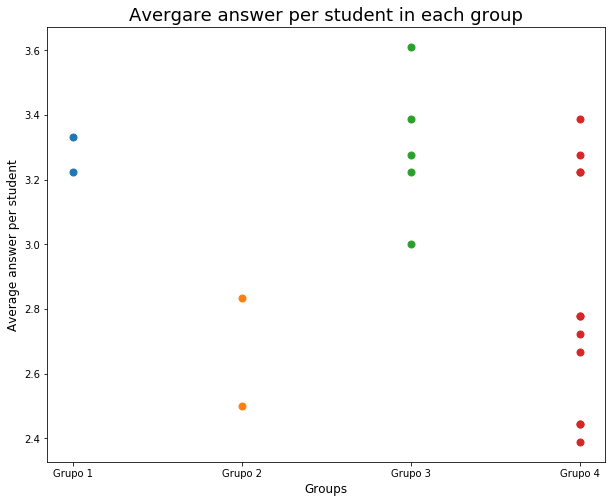

In [15]:
plt.figure(figsize=(10,8))
plt.plot(grupo_1.Grupo, grupo_1['Promedio tnc'],'.',markersize=14)
plt.plot(grupo_2.Grupo, grupo_2['Promedio tnc'],'.',markersize=14)
plt.plot(grupo_3.Grupo, grupo_3['Promedio tnc'],'.',markersize=14)
plt.plot(grupo_4.Grupo, grupo_4['Promedio tnc'],'.',markersize=14)
plt.title('Avergare answer per student in each group',fontsize=18)
plt.xlabel('Groups',fontsize=12)
plt.ylabel('Average answer per student',fontsize=12)
plt.show()

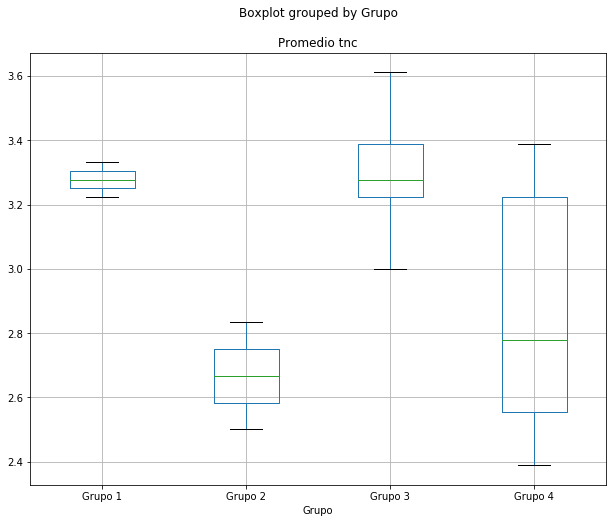

In [16]:
calificaciones.boxplot('Promedio tnc',by='Grupo',figsize=(10,8))
plt.show()

En la siguiente línea calculo el p-value para descartar H0 o no.

Debido a que estamos comprobando independencia de la respuesta promedio en el TNC con respecto a la calificación máxima obtenida, H0 será entonces la suposición de que no hay relación entre las calificaciones obtenidas y la respueta promedio en el TNC

In [17]:
'''
SI TIENE USTED ALGUNA DUDA SOBRE LA VALIDACIÓN DE LA LIBRERÍA UTILIZADA O SIMILAR, AQUÍ ESTÁ
LA DOCUMENTACIÓN:

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html

scipy es una biblioteca de python optimizada para este tipo de cálculos estadísticos.

'''



stats.f_oneway(grupo_1['Promedio tnc'],grupo_2['Promedio tnc'],grupo_3['Promedio tnc'],
              grupo_4['Promedio tnc'])


F_onewayResult(statistic=3.549920100048634, pvalue=0.03841309584815963)

# Conclusión

Debido a que mi P-value fue menor a 0.5, podemos fácilmente rechazar la hipótesis nula y decir que en efecto existe una relación entre las respuestas en el TNC y la calificación máxima optenida. Es decir, el interés de aprender de los alumnos se ve reflejado en sus calificaciones.